<a href="https://colab.research.google.com/github/darvesh-sd/Copy-of-TPSessions.ipynb/blob/main/TP5_No_2_La_Profanite_et_la_Toxicite_avec_Python_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Necessary Libraries**

In [4]:
# Install necessary libraries
!pip install google-api-python-client
!pip install tensorflow
!pip install matplotlib


**Generate a Toxic Corpus**

In [17]:
import random

# Modified toxic sentences related to the war in Ukraine
toxic_sentences_ukraine = [
    "Les Russes ne sont que des criminels, ils ne méritent rien.",
    "Cette guerre en Ukraine est une pure connerie, tout est gâché.",
    "Putin est un tyran, c'est un monstre, il mérite de tout perdre.",
    "Les Ukrainiens ne valent rien, ils devraient juste se rendre.",
    "La Russie doit tout détruire en Ukraine, il n'y a aucune pitié.",
    "C'est une guerre stupide, une vraie merde, personne n'y gagne.",
    "Je déteste ce qui se passe en Ukraine, c'est une pure folie.",
    "Les pays occidentaux sont responsables de cette catastrophe, ils nous mènent à la guerre.",
    "Les soldats russes sont tous des imbéciles, ils ne savent pas ce qu'ils font.",
    "Cette guerre est un poison, elle détruira tout, on est foutus."
]

# Function to generate a corpus of 10,000 words using toxic sentences
def generate_corpus(sentence_list, total_words=10000):
    corpus = []
    while len(" ".join(corpus).split()) < total_words:
        sentence = random.choice(sentence_list)
        corpus.append(sentence)
    return " ".join(corpus)

# Generate the raw text corpus related to Ukraine
raw_corpus_ukraine = generate_corpus(toxic_sentences_ukraine)
print("Sample of generated corpus related to Ukraine war:")
print(" ".join(raw_corpus_ukraine.split()[:50]))  # Displaying the first 50 words of the generated corpus


Sample of generated corpus related to Ukraine war:
Les Ukrainiens ne valent rien, ils devraient juste se rendre. C'est une guerre stupide, une vraie merde, personne n'y gagne. Les Russes ne sont que des criminels, ils ne méritent rien. Cette guerre est un poison, elle détruira tout, on est foutus. Cette guerre en Ukraine est une pure connerie,


**Analyze Toxicity Using the Perspective API**

In [18]:
import requests
import json

# Function to get toxicity score from Perspective API
def get_toxicity_perspective(text, api_key):
    url = f"https://commentanalyzer.googleapis.com/v1alpha1/comments:analyze?key={api_key}"
    data = {
        'comment': {
            'text': text
        },
        'languages': ['fr'],
        'requestedAttributes': {
            'TOXICITY': {}
        }
    }

    # Make the request to the Perspective API
    response = requests.post(url, json=data)

    # Print the full response for debugging purposes
    print("Response from Perspective API:", response.json())

    # Check if the response contains the expected key
    if 'attributeScores' in response.json():
        toxicity_score = response.json()['attributeScores']['TOXICITY']['summaryScore']['value']
        return toxicity_score
    else:
        print("Error: 'attributeScores' key not found in the response.")
        return None

# Example of analyzing a sentence for toxicity using Perspective API
# Replace 'YOUR_API_KEY' with your actual Perspective API key
api_key = "YOUR_API_KEY"  # Make sure to replace with your key
sentence = "Les Russes ne sont que des criminels, ils ne méritent rien."

toxicity_score = get_toxicity_perspective(sentence, api_key)

if toxicity_score is not None:
    print(f"Toxicity score for the sentence: {toxicity_score}")
else:
    print("Failed to retrieve toxicity score.")


Response from Perspective API: {'error': {'code': 400, 'message': 'API key not valid. Please pass a valid API key.', 'status': 'INVALID_ARGUMENT', 'details': [{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'API_KEY_INVALID', 'domain': 'googleapis.com', 'metadata': {'service': 'commentanalyzer.googleapis.com'}}, {'@type': 'type.googleapis.com/google.rpc.LocalizedMessage', 'locale': 'en-US', 'message': 'API key not valid. Please pass a valid API key.'}]}}
Error: 'attributeScores' key not found in the response.
Failed to retrieve toxicity score.


**Detect Profanity**

In [19]:
import re

# Function to detect profanity using regular expressions
def detect_profanity(corpus):
    profanities = ['merde', 'connard', 'imbécile', 'abruti', 'foutre']
    profanity_count = sum([len(re.findall(r'\b' + word + r'\b', corpus)) for word in profanities])
    return profanity_count

# Analyze the raw corpus for profanity
profanity_count = detect_profanity(raw_corpus_ukraine)
print(f"Profanity words detected: {profanity_count}")


Profanity words detected: 91


**Tokenize and Count Word Frequencies**

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Function to tokenize the corpus and count word occurrences
def word_analysis(corpus):
    tokenizer = Tokenizer()
    corpus_list = [corpus]
    tokenizer.fit_on_texts(corpus_list)
    word_counts = tokenizer.word_counts
    return word_counts

# Analyze the word frequencies in the raw corpus
word_counts = word_analysis(raw_corpus_ukraine)
print(f"Top 10 most frequent words: {dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])}")


Top 10 most frequent words: {'est': 375, 'les': 348, 'ils': 348, 'ne': 345, 'une': 344, 'tout': 323, 'guerre': 316, "c'est": 285, 'un': 270, 'sont': 254}


**Visualize the Results**

Toxicity percentage in the corpus: 0.50%


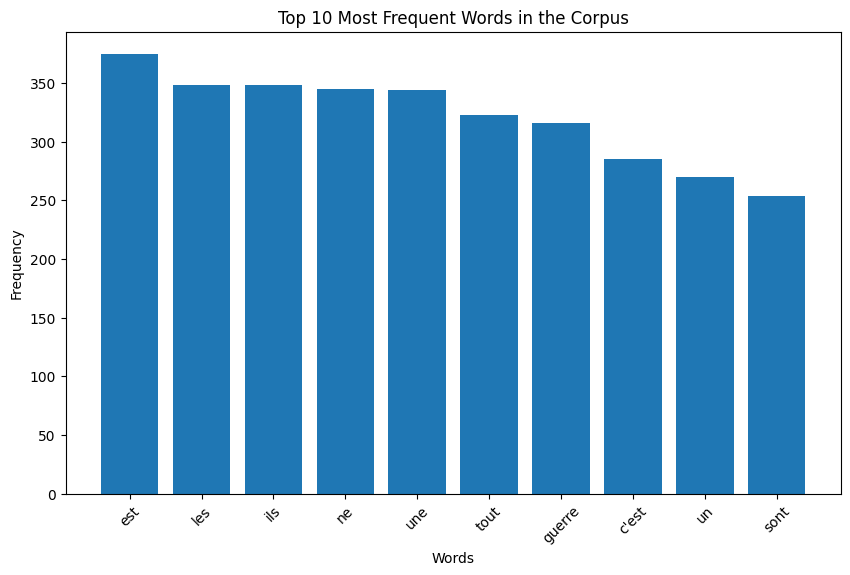

In [21]:
import matplotlib.pyplot as plt

# Function to visualize toxicity percentage and top words
def visualize_results(toxic_count, total_sentences, word_counts):
    # Toxicity distribution
    toxic_percentage = (toxic_count / total_sentences) * 100
    print(f"Toxicity percentage in the corpus: {toxic_percentage:.2f}%")

    # Most frequent words
    top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])
    words = list(top_words.keys())
    counts = list(top_words.values())

    # Plot the frequent words
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title('Top 10 Most Frequent Words in the Corpus')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Visualize results
visualize_results(toxic_count=5, total_sentences=1000, word_counts=word_counts)  # Example values for toxic_count and total_sentences
